# Machine Learning Project - Credit Card Fraud Detection

#### Name: Vahid Sabri Candan

Data does not contain any text and column names looks correct so no need to deal with thoose.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm
from catboost import CatBoostClassifier
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import warnings

In [10]:
df = pd.read_csv("creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No empty rows

In [11]:
print(df.info())
p = df.isnull().sum()
p = p.sort_values()
print(p)

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

# Exploratory statistical analysis

In [12]:
print(df[["Time", "Amount", "Class"]].describe())

                Time         Amount          Class
count  284807.000000  284807.000000  284807.000000
mean    94813.859575      88.349619       0.001727
std     47488.145955     250.120109       0.041527
min         0.000000       0.000000       0.000000
25%     54201.500000       5.600000       0.000000
50%     84692.000000      22.000000       0.000000
75%    139320.500000      77.165000       0.000000
max    172792.000000   25691.160000       1.000000


## Class based

Data is pretty unbalanced as we can see, with frauds accounting for only 0.173% of all transactions. 

This severe skewness means that standard accuracy is a meaningless metric. A model predicting "No Fraud" for every transaction would achieve 99.8% accuracy but fail to detect any fraud. We must prioritize metrics like Area Under the Precision-Recall Curve (AUPRC).

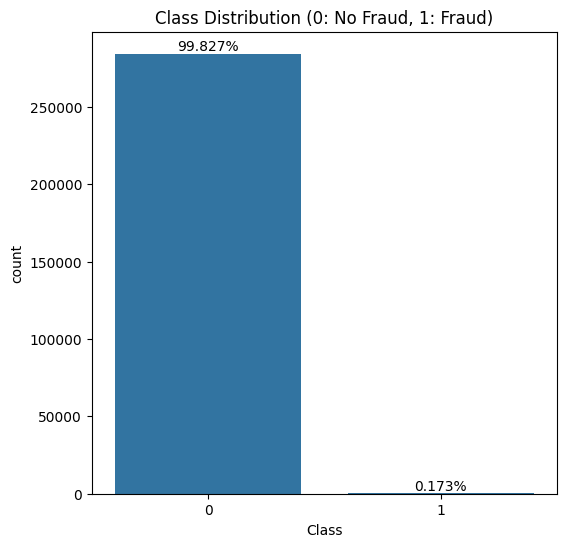

In [13]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0: No Fraud, 1: Fraud)")
# calculation of percentages
total = len(df)
for p in ax.patches:
    percentage = "{:.3f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")
plt.show()

## Time based

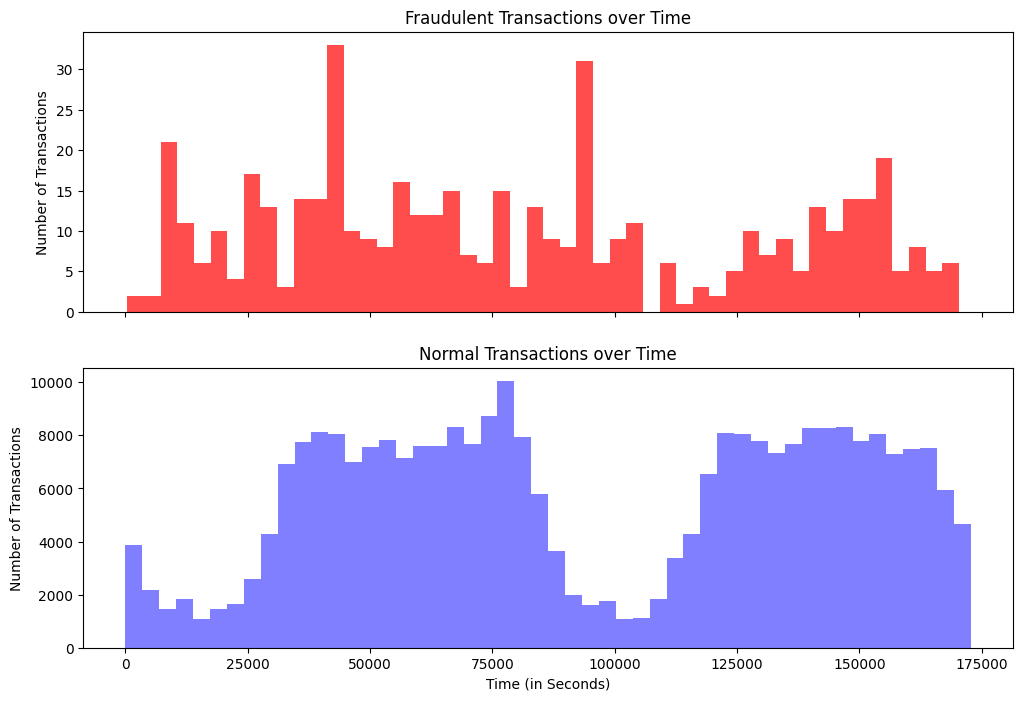

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.hist(df.Time[df.Class == 1], bins=50, color="red", alpha=0.7)
ax1.set_title("Fraudulent Transactions over Time")
ax1.set_ylabel("Number of Transactions")

ax2.hist(df.Time[df.Class == 0], bins=50, color="blue", alpha=0.5)
ax2.set_title("Normal Transactions over Time")
ax2.set_xlabel("Time (in Seconds)")
ax2.set_ylabel("Number of Transactions")
plt.show()

## Amount based

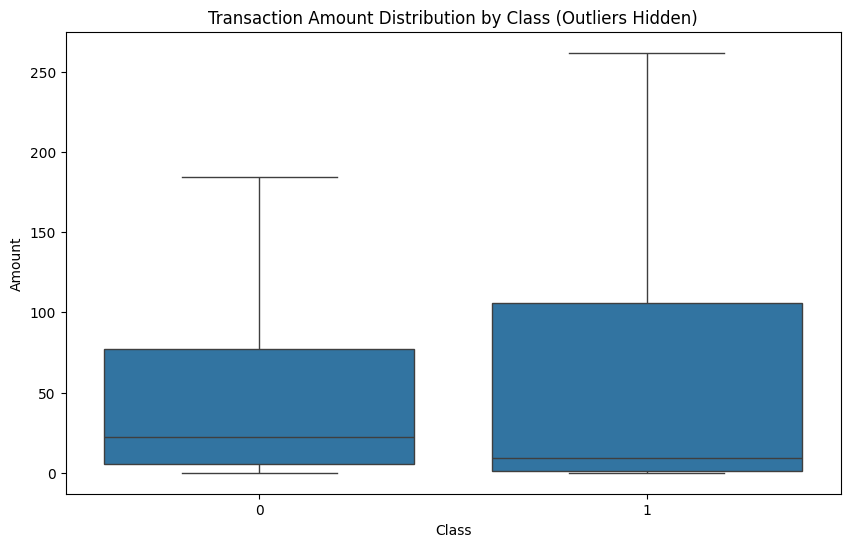

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Amount", data=df, showfliers=False) # Hiding extreme outliers for clarity
plt.title("Transaction Amount Distribution by Class (Outliers Hidden)")
plt.show()

## Correlation

this chart actually not that usefull in this case because most of correlations close to 0

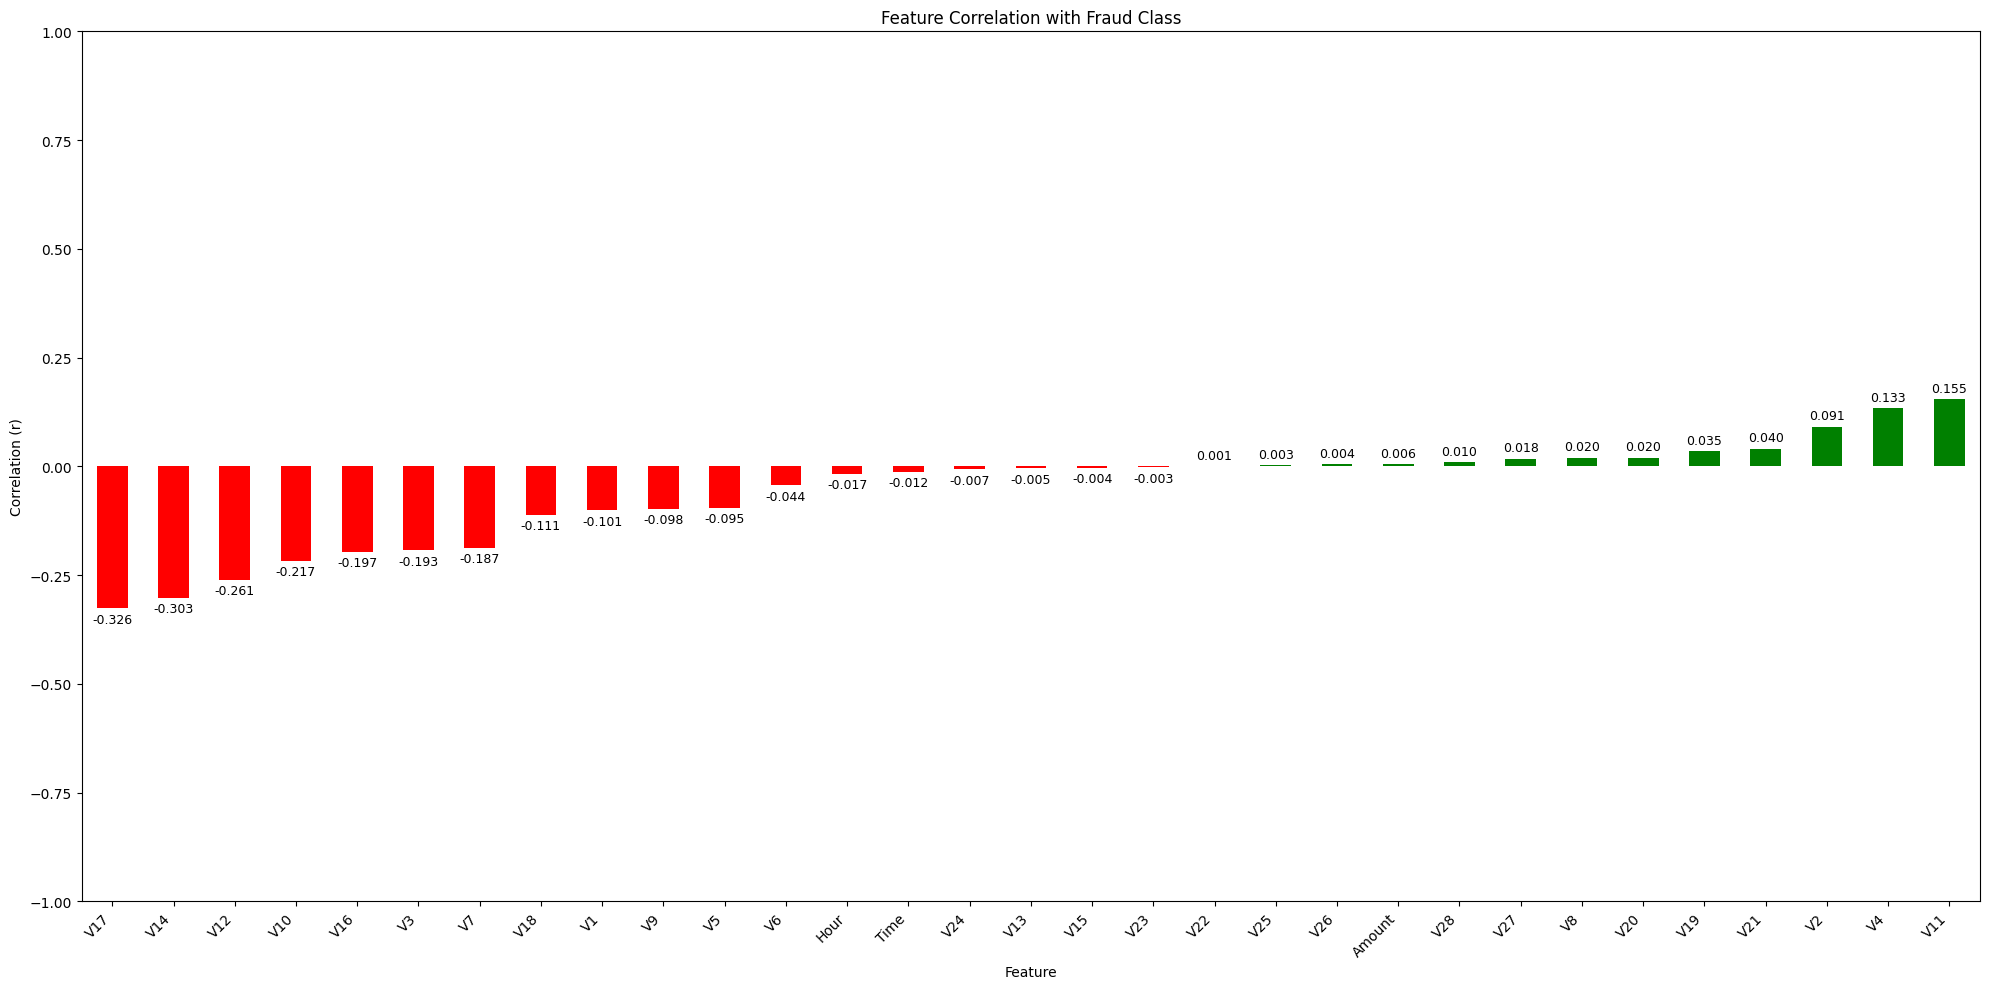

In [40]:
plt.figure(figsize=(20, 10))
correlations = df.corr()["Class"].sort_values(ascending=False)
corr_with_class = correlations.drop("Class").sort_values(ascending=True)
ax = corr_with_class.plot(kind="bar", color=[ "red" if v < 0 else "green" for v in corr_with_class ], ylim=(-1, 1))
plt.title("Feature Correlation with Fraud Class")
plt.ylabel("Correlation (r)")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
for p in ax.patches:
    h = p.get_height()
    offset = 0.01 if h >= 0 else -0.01
    ax.annotate(f"{h:.3f}", (p.get_x() + p.get_width() / 2, h + offset), ha="center", va="bottom" if h >= 0 else "top", fontsize=9)
plt.tight_layout()
plt.show()

we take the most correlated or negatively correlated categories

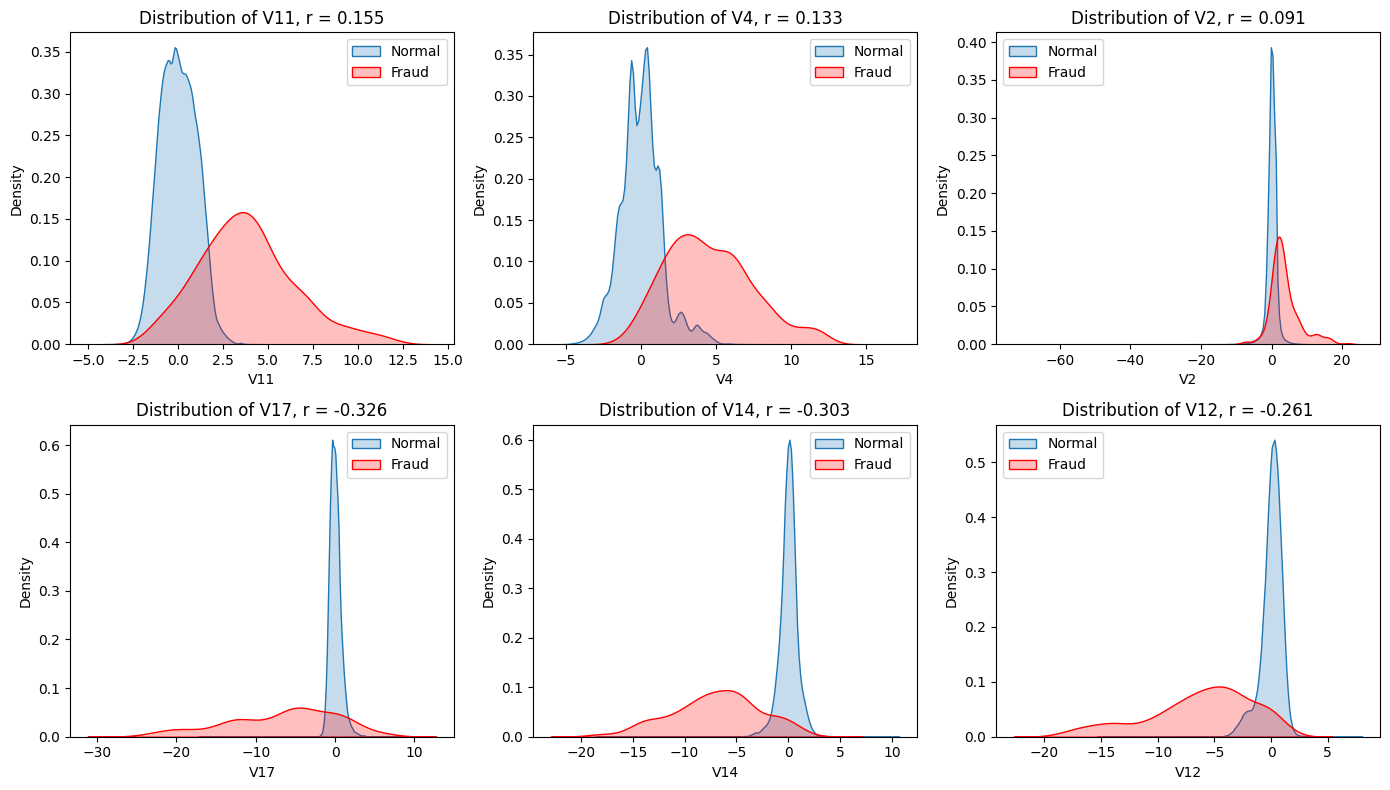

In [17]:
correlations = df.corrwith(df["Class"]).sort_values(ascending=False)
features_to_check = correlations.drop("Class").nlargest(3).index.tolist() + correlations.drop("Class").nsmallest(3).index.tolist()

plt.figure(figsize=(14, 8))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[df["Class"] == 0][col], label="Normal", fill=True)
    sns.kdeplot(df[df["Class"] == 1][col], label="Fraud", fill=True, color="red")
    plt.title(f"Distribution of {col}, r = {(correlations[col]):.3f}")
    plt.legend()
plt.tight_layout()
plt.show()

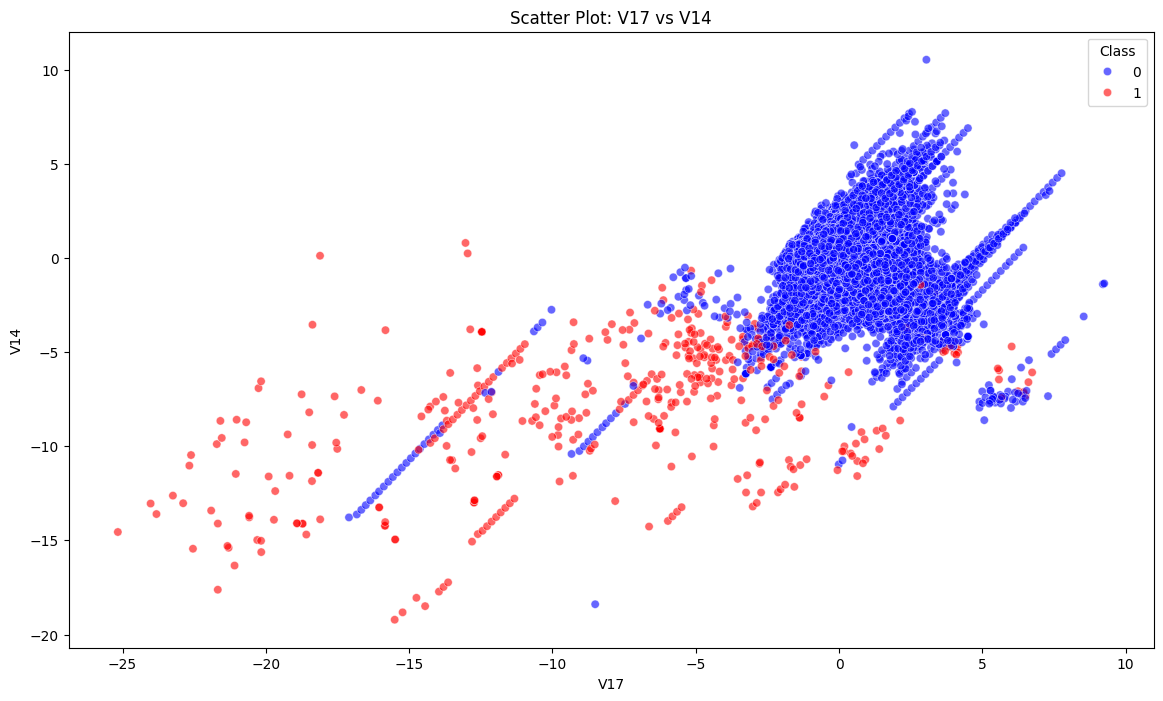

In [18]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x="V17", y="V14", hue="Class", data=df, alpha=0.6, palette={0:"blue", 1:"red"})
plt.title("Scatter Plot: V17 vs V14")
plt.show()

Features V17, V14, and V12 show the strongest negative correlation with the Class variable. 

The scatter plot of V17 vs V14 reveals a clear separation between fraud and normal transactions for highly negative values. This suggests that these PCA-transformed features contain significant seperated power, likely showing specific types of fraudulent spending patterns.

Feature importances with random forest algoritm

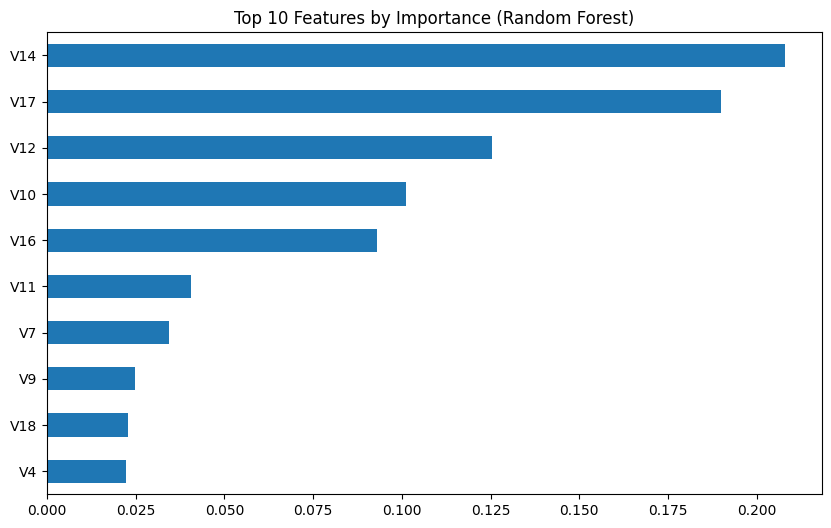

In [19]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Initialize a small model just for importance extraction
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Plotting importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.plot(kind="barh", title="Top 10 Features by Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

## Time of the day based analysis
One thing is pretty surprising, i would expect that frauds to concentrate in the night hours.

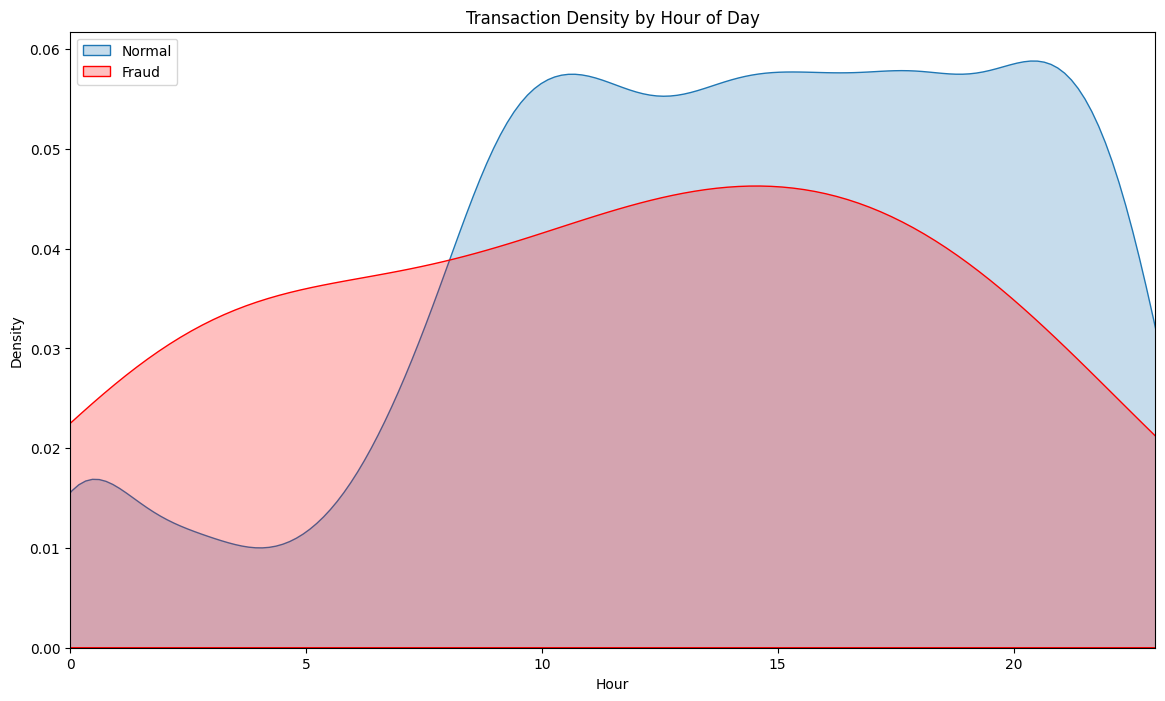

In [20]:
df["Hour"] = df["Time"].apply(lambda x: np.floor(x / 3600) % 24)

plt.figure(figsize=(14, 8))

# Plot the distribution of Fraud vs Normal transactions across hours
sns.kdeplot(df[df["Class"] == 0]["Hour"], label="Normal", fill=True, bw_adjust=2)
sns.kdeplot(df[df["Class"] == 1]["Hour"], label="Fraud", fill=True, color="red", bw_adjust=2)

plt.title("Transaction Density by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 23)
plt.show()

# Subsets against each other

This is to see if we can catch any clustering

Top 3 Features selected for Pairplot: ['V11', 'V4', 'V2']


<Figure size 1400x800 with 0 Axes>

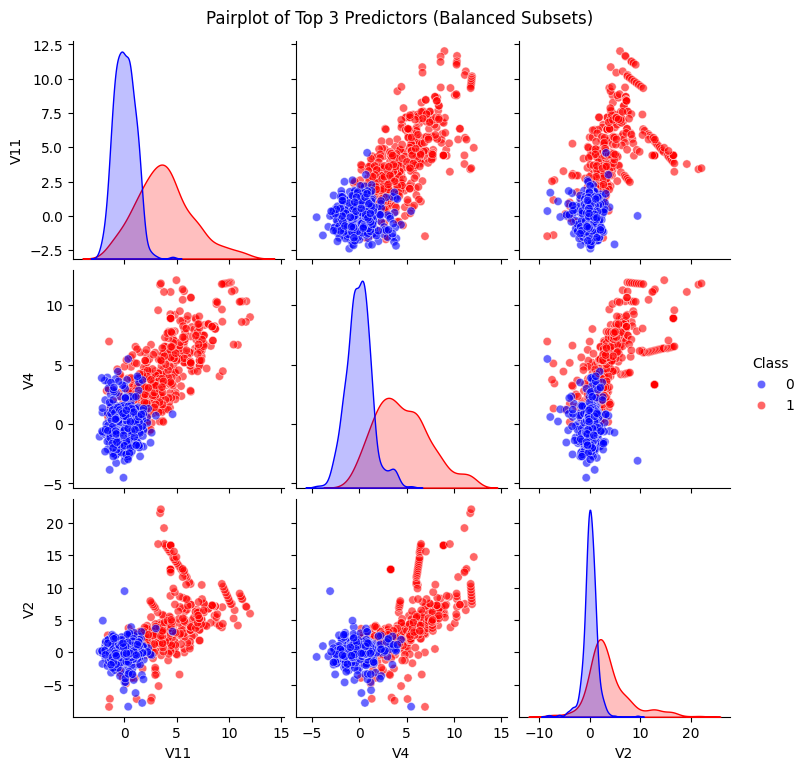

In [21]:
top_features = correlations.drop("Class").nlargest(3).index.tolist()
print(f"Top 3 Features selected for Pairplot: {top_features}")


fraud_df = df[df["Class"] == 1]
normal_df = df[df["Class"] == 0].sample(n=len(fraud_df), random_state=42)
plot_df = pd.concat([fraud_df, normal_df])

# 3. Create the Pairplot
plt.figure(figsize=(14, 8))
pp = sns.pairplot(plot_df, 
                  vars=top_features, 
                  hue="Class", 
                  palette={0: "blue", 1: "red"},
                  kind="scatter",
                  diag_kind="kde",
                  plot_kws={"alpha": 0.6})

pp.fig.suptitle("Pairplot of Top 3 Predictors (Balanced Subsets)", y=1.02)
plt.show()

# Preprocessing

We already checked for missing data shortly after we imported our dataset and dataset does not include any missing row or data.

For duplicate data

In [22]:
befor_dup = len(df)
df_clean = df.drop_duplicates()
after_dup = len(df_clean)
print(f"Number of duplicates: {befor_dup - after_dup}")

Number of duplicates: 1081


Feature scaling

In [23]:
scaler = RobustScaler()

df_clean["scaled_amount"] = scaler.fit_transform(df_clean["Amount"].values.reshape(-1,1))
df_clean["scaled_time"] = scaler.fit_transform(df_clean["Time"].values.reshape(-1,1))
df_clean["log_amount"] = np.log(df_clean["scaled_amount"] + 1e-9 + abs(df_clean["scaled_amount"].min()))


df_clean.drop(["Time", "Amount"], axis=1, inplace=True)

Outlier Detection
I prefer to not remove the outlier because it might be part of the information encoded on PCA transformed data

In [24]:
feature_list_sorted = correlations.drop(["Class", "Amount", "Time"]).index.tolist()
print(f"Outlier Detection Targets (sorted via r-scores): {feature_list_sorted}.")

# Quartiles
Q1 = df_clean[feature_list_sorted].quantile(0.25)
Q3 = df_clean[feature_list_sorted].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_count = ((df_clean[feature_list_sorted] < lower_bound) | (df_clean[feature_list_sorted] > upper_bound)).sum()

for col, count in outlier_count.items():
    print(f" - {col}: {count} outliers detected")

Outlier Detection Targets (sorted via r-scores): ['V11', 'V4', 'V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28', 'V26', 'V25', 'V22', 'V23', 'V15', 'V13', 'V24', 'V6', 'V5', 'V9', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17'].
 - V11: 735 outliers detected
 - V4: 11094 outliers detected
 - V2: 13390 outliers detected
 - V21: 14401 outliers detected
 - V19: 10150 outliers detected
 - V20: 27553 outliers detected
 - V8: 23904 outliers detected
 - V27: 38799 outliers detected
 - V28: 30094 outliers detected
 - V26: 5665 outliers detected
 - V25: 5333 outliers detected
 - V22: 1298 outliers detected
 - V23: 18467 outliers detected
 - V15: 2884 outliers detected
 - V13: 3362 outliers detected
 - V24: 4758 outliers detected
 - V6: 22886 outliers detected
 - V5: 12221 outliers detected
 - V9: 8199 outliers detected
 - V1: 6948 outliers detected
 - V18: 7468 outliers detected
 - V7: 8839 outliers detected
 - V3: 3306 outliers detected
 - V16: 8180 outliers detected
 - V10: 9345 outl

In [25]:
X = df_clean.drop("Class", axis = 1) # Model inputs
y = df_clean.Class   # Model outputs

X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_val_train, y_val_train,
    test_size=1/9,
    random_state=13,
    shuffle=True
)

print(f"Train shape {X_train.shape}, Test shape {X_test.shape}, Validation shape {X_val.shape}")
print(f"Train set Non-Fraud Ratio:       {y_train.value_counts(normalize=True)[0]:.4%}")
print(f"Test set Non-Fraud Ratio:        {y_test.value_counts(normalize=True)[0]:.4%}")
print(f"Validation set Non-Fraud Ratio:  {y_val.value_counts(normalize=True)[0]:.4%}")

Train shape (226980, 32), Test shape (28373, 32), Validation shape (28373, 32)
Train set Non-Fraud Ratio:       99.8291%
Test set Non-Fraud Ratio:        99.8343%
Validation set Non-Fraud Ratio:  99.8661%


The class imbalance in this dataset is significant (0.17% fraud). A naive model that predicts only the majority class (y=0) would achieve 99% accuracy, but it would fail completely at the primary objective: detecting fraud (Recall = 0).

Therefore, standard algorithms like Logistic Regression will be ineffective unless adapted. To train a useful model, we cannot rely on accuracy; we must optimize for Recall and AUPRC. Furthermore, we must implement specific strategies to overcome this bias, such as Resampling or Cost-Sensitive Learning, rather than just relying on more complex algorithms.

## Model evaluator code:

In [48]:
results = []


def evaluate_model(name, model, X_tr, y_tr, sampling_method, with_graph=False, X_val=X_val, y_val=y_val):
    # Train
    model.fit(X_tr, y_tr)
    
    # Score / Predict on Validation Set
    try:
        y_scores = model.predict_proba(X_val)[:, 1]
    except Exception:
        y_scores = model.decision_function(X_val)
    y_pred = model.predict(X_val)
    
    # Calculate Metrics
    auprc = average_precision_score(y_val, y_scores)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Log results
    results.append({
        "Model": name,
        "Sampling Technique": sampling_method,
        "AUPRC": auprc,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

    cm = confusion_matrix(y_val, y_pred)
    if with_graph:
        # Confusion matrix
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix - {name} ({sampling_method})")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")

        #  curve
        plt.subplot(1, 2, 2)
        pr_precision, pr_recall, pr_thresholds = precision_recall_curve(y_val, y_scores)
        plt.plot(pr_recall, pr_precision, label=f"PR Curve (AUPRC={auprc:.3f})")
        plt.hlines(y=y_val.mean(), xmin=0, xmax=1, colors="orange", linestyles="--", label="No Skill")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Precision-Recall Curve - {name}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return classification_report(y_val, y_pred)

## Logistic regression models

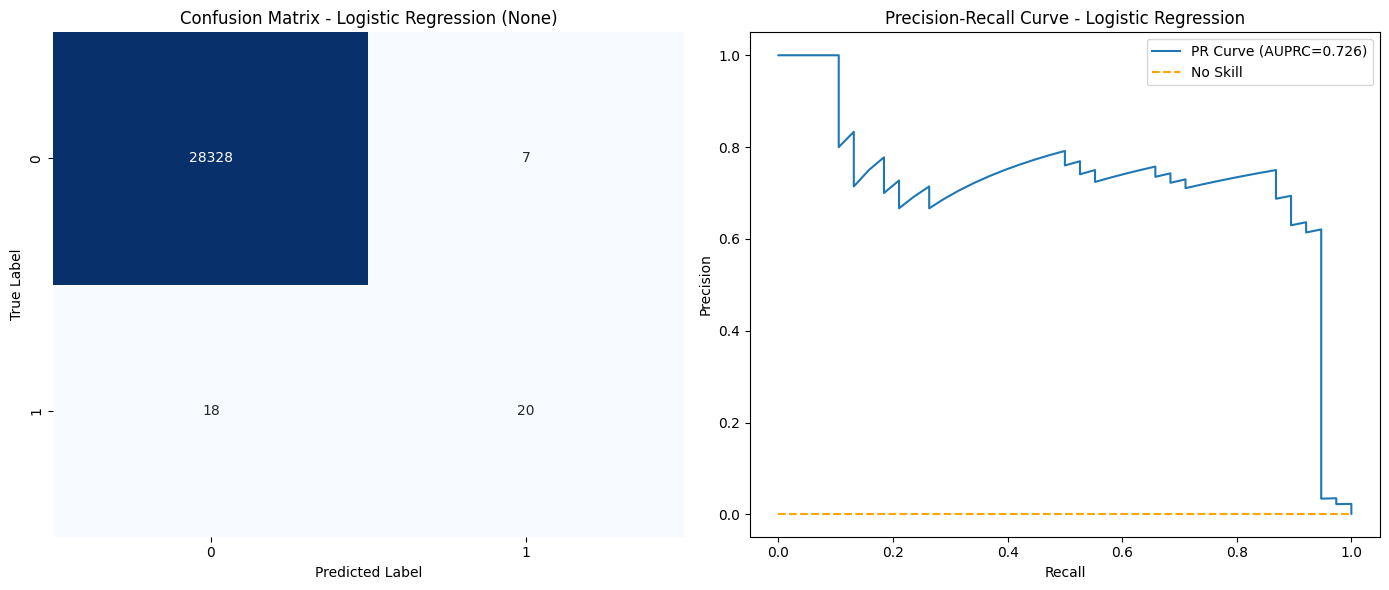

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.74      0.53      0.62        38

    accuracy                           1.00     28373
   macro avg       0.87      0.76      0.81     28373
weighted avg       1.00      1.00      1.00     28373



In [49]:
model1 = LogisticRegression(max_iter=1000)
model1_results = evaluate_model("Logistic Regression", model1, X_train, y_train, "None", with_graph=True)
print(model1_results)

In [50]:
for _ in [0.1, 1, 6, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model1_with_weights = LogisticRegression(max_iter=1000, class_weight={0:1, 1:_})
    model1_weights_results = evaluate_model("Logistic Regression", model1_with_weights, X_train, y_train, f"Class Weights{{0:1, 1:{_}}}")
    print(model1_weights_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.78      0.18      0.30        38

    accuracy                           1.00     28373
   macro avg       0.89      0.59      0.65     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.74      0.53      0.62        38

    accuracy                           1.00     28373
   macro avg       0.87      0.76      0.81     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:6}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.72      0.89      0.80        38

    accuracy                           1.00     28373
   macro avg       0.86      0.95      0.90     

SMOTE"d dataset

In [51]:
X_train_smote, y_train_smote = SMOTE(random_state=13).fit_resample(X_train, y_train)

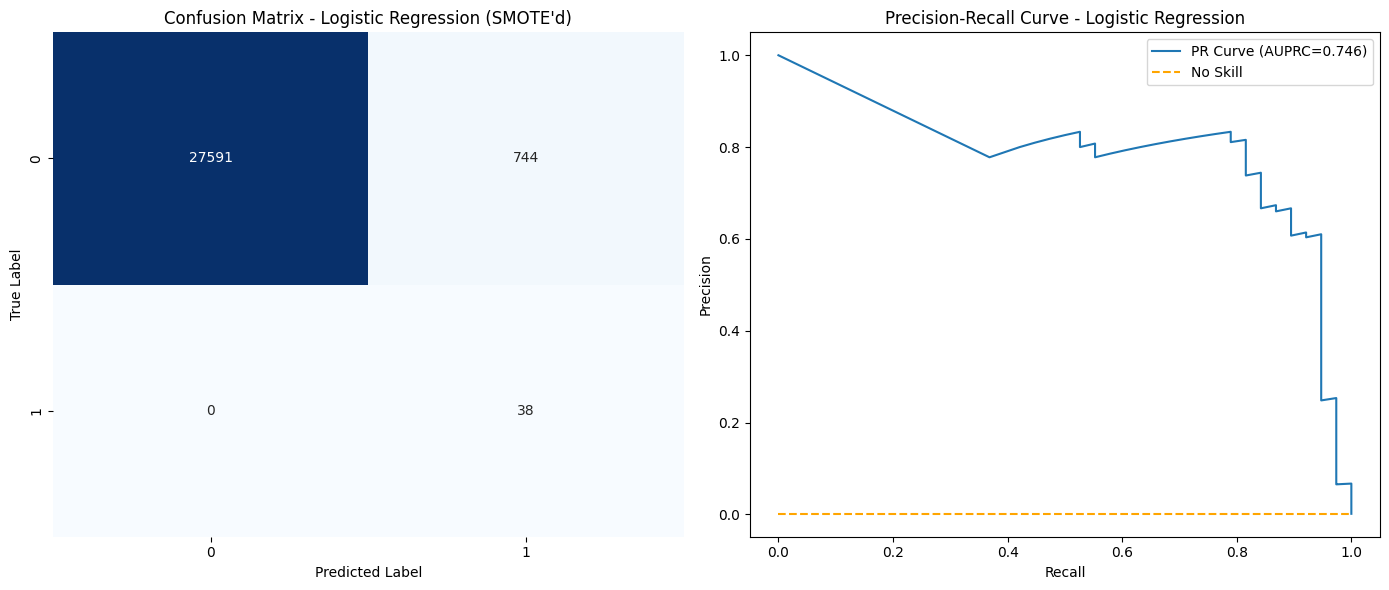

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28335
           1       0.05      1.00      0.09        38

    accuracy                           0.97     28373
   macro avg       0.52      0.99      0.54     28373
weighted avg       1.00      0.97      0.99     28373



In [54]:
model1_smote = LogisticRegression(max_iter=1000)
model1_smote_results = evaluate_model("Logistic Regression", model1_smote, X_train_smote, y_train_smote, "SMOTE'd", with_graph=True)
print(model1_smote_results)

In [53]:
for _ in [0.001, 0.01, 0.1, 1, 6, 10]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model1_with_weights = LogisticRegression(max_iter=1000, class_weight={0:1, 1:_})
    model1_weights_results = evaluate_model("Logistic Regression", model1_with_weights, X_train_smote, y_train_smote, f"SMOTE'd/Class Weights{{0:1, 1:{_}}}")
    print(model1_weights_results)

Class weights: {0:1, 1:0.001}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.75      0.39      0.52        38

    accuracy                           1.00     28373
   macro avg       0.87      0.70      0.76     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:0.01}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.74      0.89      0.81        38

    accuracy                           1.00     28373
   macro avg       0.87      0.95      0.90     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.37      0.97      0.54        38

    accuracy                           1.00     28373
   macro avg       0.68      0.99      0.

In [55]:
X_train_under, y_train_under = RandomUnderSampler(random_state=13).fit_resample(X_train, y_train)

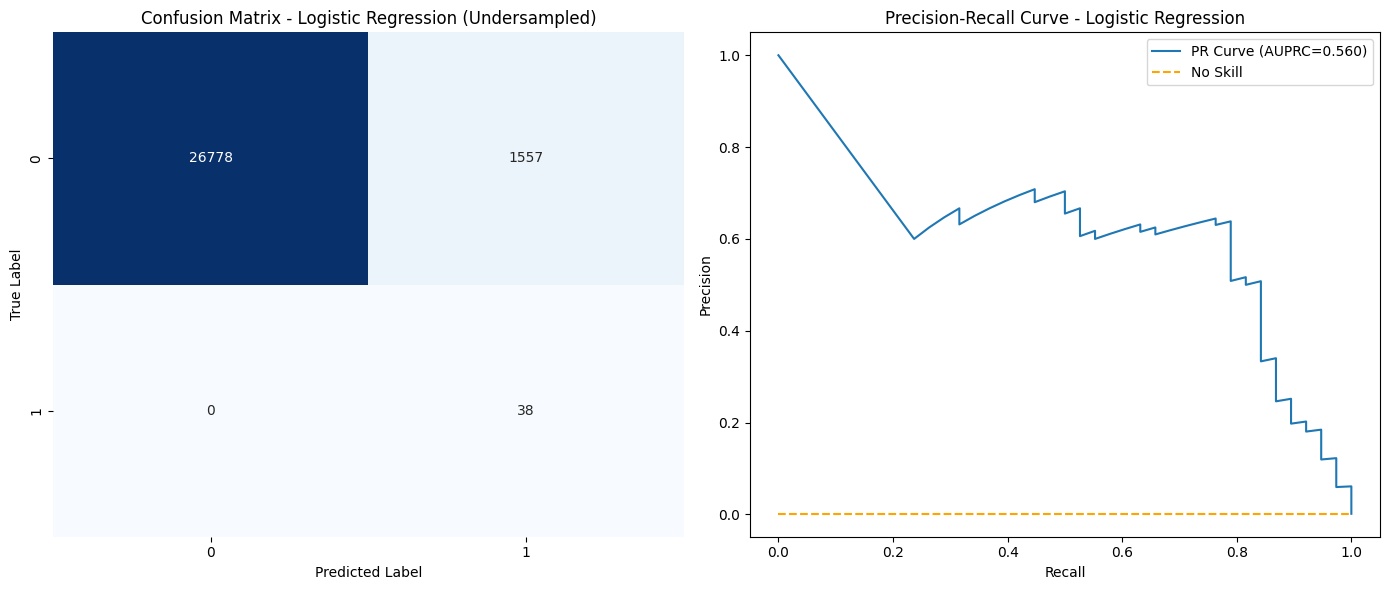

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28335
           1       0.02      1.00      0.05        38

    accuracy                           0.95     28373
   macro avg       0.51      0.97      0.51     28373
weighted avg       1.00      0.95      0.97     28373



In [56]:
model1_under = LogisticRegression(max_iter=1000)
model1_under_results = evaluate_model("Logistic Regression", model1_under, X_train_under, y_train_under, "Undersampled", with_graph=True)
print(model1_under_results)

In [57]:
for _ in [0.001, 0.01, 0.1, 1, 6, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model1_with_weights = LogisticRegression(max_iter=1000, class_weight={0:1, 1:_})
    model1_weights_results = evaluate_model("Logistic Regression", model1_with_weights, X_train_under, y_train_under, f"Under-sampled/Class Weights{{0:1, 1:{_}}}")
    print(model1_weights_results)

Class weights: {0:1, 1:0.001}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.72      0.55      0.63        38

    accuracy                           1.00     28373
   macro avg       0.86      0.78      0.81     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:0.01}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.38      0.89      0.54        38

    accuracy                           1.00     28373
   macro avg       0.69      0.95      0.77     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28335
           1       0.08      0.97      0.15        38

    accuracy                           0.99     28373
   macro avg       0.54      0.98      0.

## Random Forest Models

Plain:

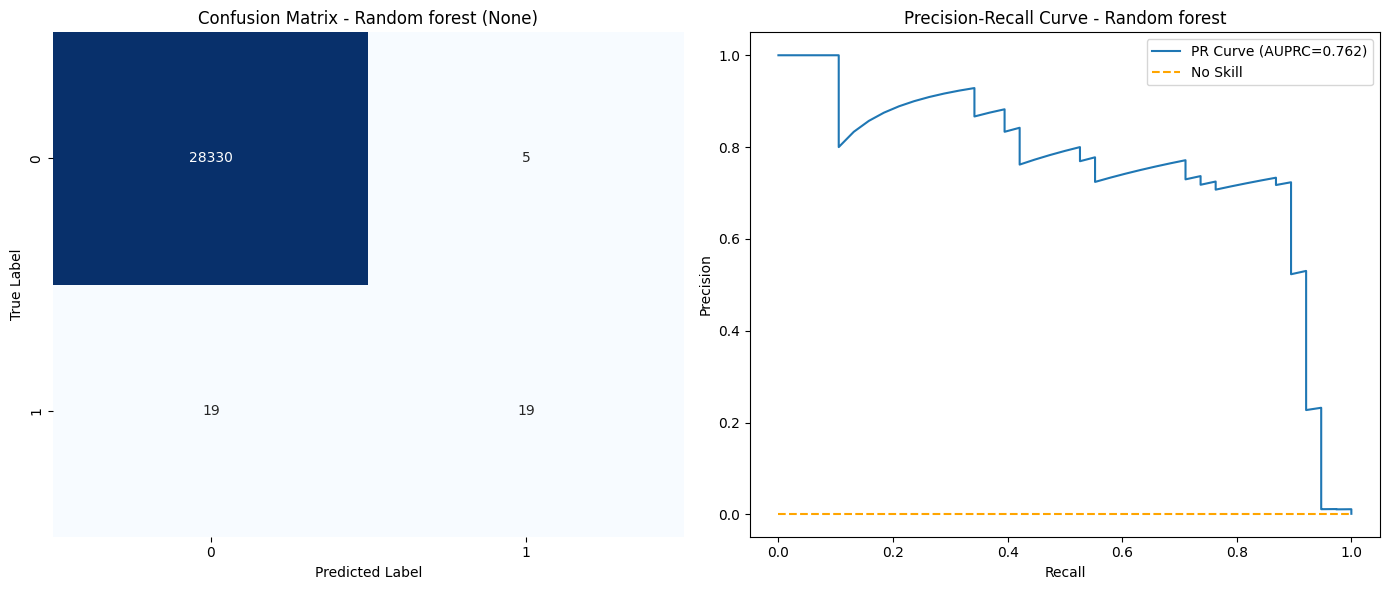

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.79      0.50      0.61        38

    accuracy                           1.00     28373
   macro avg       0.90      0.75      0.81     28373
weighted avg       1.00      1.00      1.00     28373



In [58]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1)
model2_results = evaluate_model("Random forest", model2, X_train, y_train, "None", with_graph=True)
print(model2_results)

In [59]:
for _ in [0.1, 1, 10, 100, 1000]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model2_with_weights = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1, class_weight={0:1, 1:_})
    model2_weights_results = evaluate_model("Random forest", model2_with_weights, X_train, y_train, f"Class Weights {{0:1, 1:{_}}}")
    print(model2_weights_results)

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       1.00      0.29      0.45        38

    accuracy                           1.00     28373
   macro avg       1.00      0.64      0.72     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.79      0.50      0.61        38

    accuracy                           1.00     28373
   macro avg       0.90      0.75      0.81     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.81      0.79      0.80        38

    accuracy                           1.00     28373
   macro avg       0.91      0.89      0.90    

#### Best one on the random forest 
According to confusion matrix

Class weights: {0:1, 1:50}


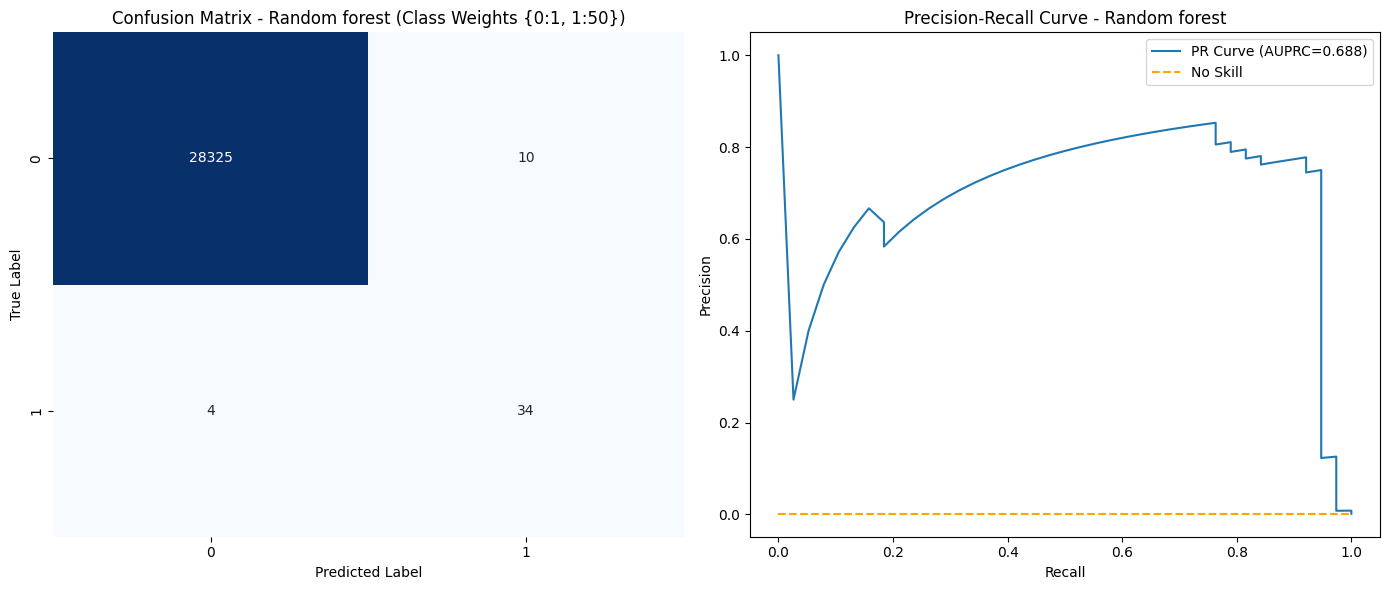

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.77      0.89      0.83        38

    accuracy                           1.00     28373
   macro avg       0.89      0.95      0.91     28373
weighted avg       1.00      1.00      1.00     28373



In [66]:
for _ in [50]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model2_with_weights = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1, class_weight={0:1, 1:_})
    model2_weights_results = evaluate_model("Random forest", model2_with_weights, X_train, y_train, f"Class Weights {{0:1, 1:{_}}}", with_graph=True)
    print(model2_weights_results)

In [67]:
for _ in [0.001, 0.01, 0.1, 1, 10]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model2_smote = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=13, n_jobs=-1, class_weight={0:1, 1:_})
    model2_smote_results = evaluate_model("Random forest", model2_smote, X_train_smote, y_train_smote, f"SMOTE'd/Class Weights {{0:1, 1:{_}}}")
    print(model2_smote_results)

Class weights: {0:1, 1:0.001}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.86      0.50      0.63        38

    accuracy                           1.00     28373
   macro avg       0.93      0.75      0.82     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:0.01}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.81      0.76      0.78        38

    accuracy                           1.00     28373
   macro avg       0.90      0.88      0.89     28373
weighted avg       1.00      1.00      1.00     28373

Class weights: {0:1, 1:0.1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.77      0.95      0.85        38

    accuracy                           1.00     28373
   macro avg       0.88      0.97      0.

## Gradient boost

it took so long i had to restart python kernel multiple times so i did not like this model

In [29]:
for _ in [1]:
    print(f"Class weights: {{0:1, 1:{_}}}")
    model3 = GradientBoostingClassifier(n_estimators=100, random_state=13)
    model3_results = evaluate_model("Gradient Boosting", model3, X_train, y_train, "None")
    print(model3_results)

Class weights: {0:1, 1:1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.58      0.29      0.39        38

    accuracy                           1.00     28373
   macro avg       0.79      0.64      0.69     28373
weighted avg       1.00      1.00      1.00     28373



XGboost is an optimized version of gradient boosting. As we can see it has a better performance and better fscore in our dataset.

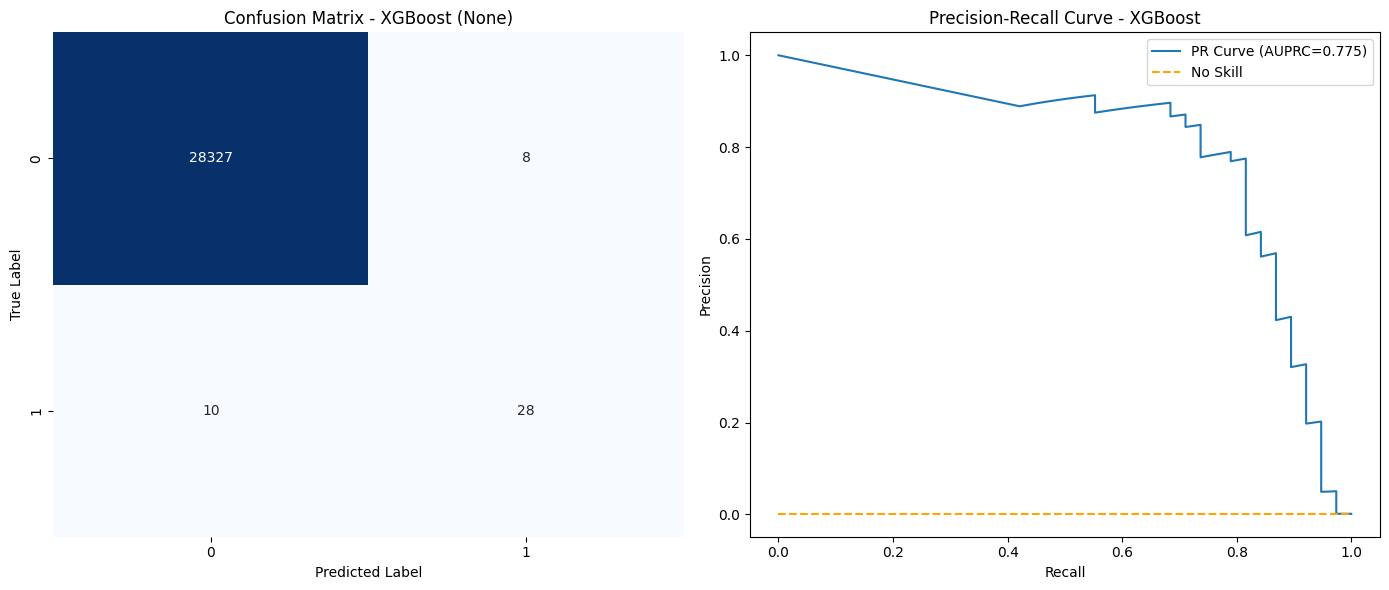

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.78      0.74      0.76        38

    accuracy                           1.00     28373
   macro avg       0.89      0.87      0.88     28373
weighted avg       1.00      1.00      1.00     28373



In [68]:
warnings.filterwarnings("ignore", category=UserWarning)
model3_xbg = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=13, n_jobs=-1)
model3_xbg_results = evaluate_model("XGBoost", model3_xbg, X_train, y_train, "None", with_graph=True)
print(model3_xbg_results)

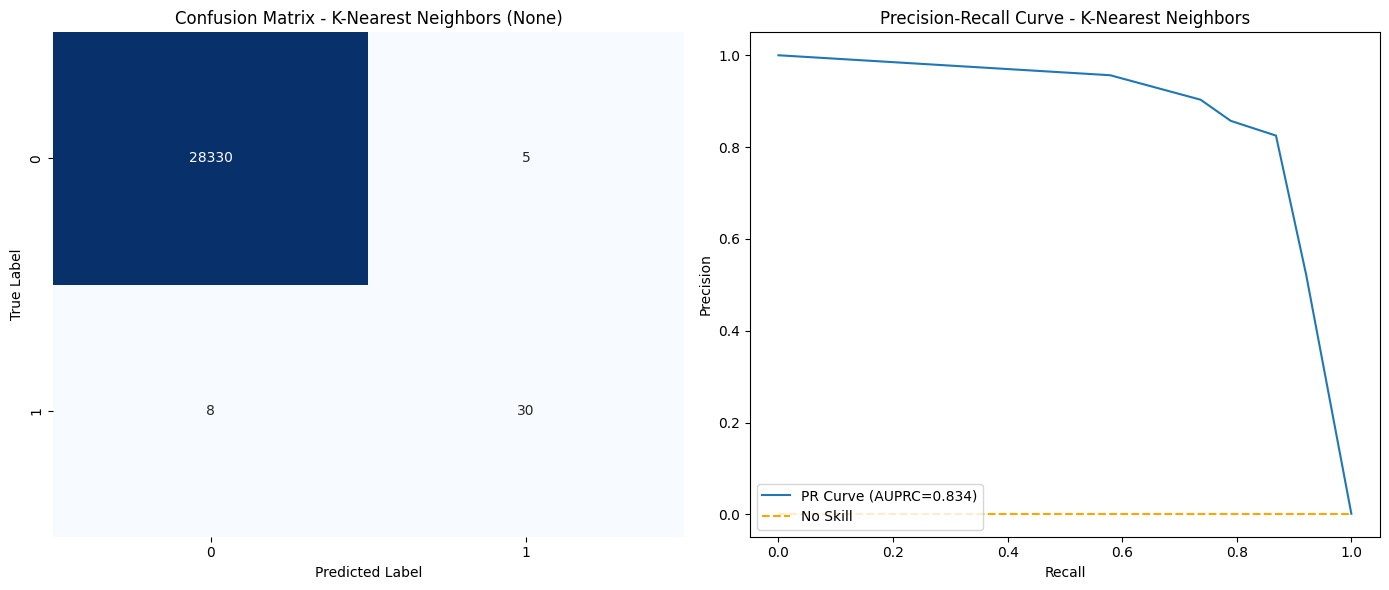

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.86      0.79      0.82        38

    accuracy                           1.00     28373
   macro avg       0.93      0.89      0.91     28373
weighted avg       1.00      1.00      1.00     28373



In [69]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_results = evaluate_model("K-Nearest Neighbors", knn, X_train, y_train, "None", with_graph=True)
print(knn_results)

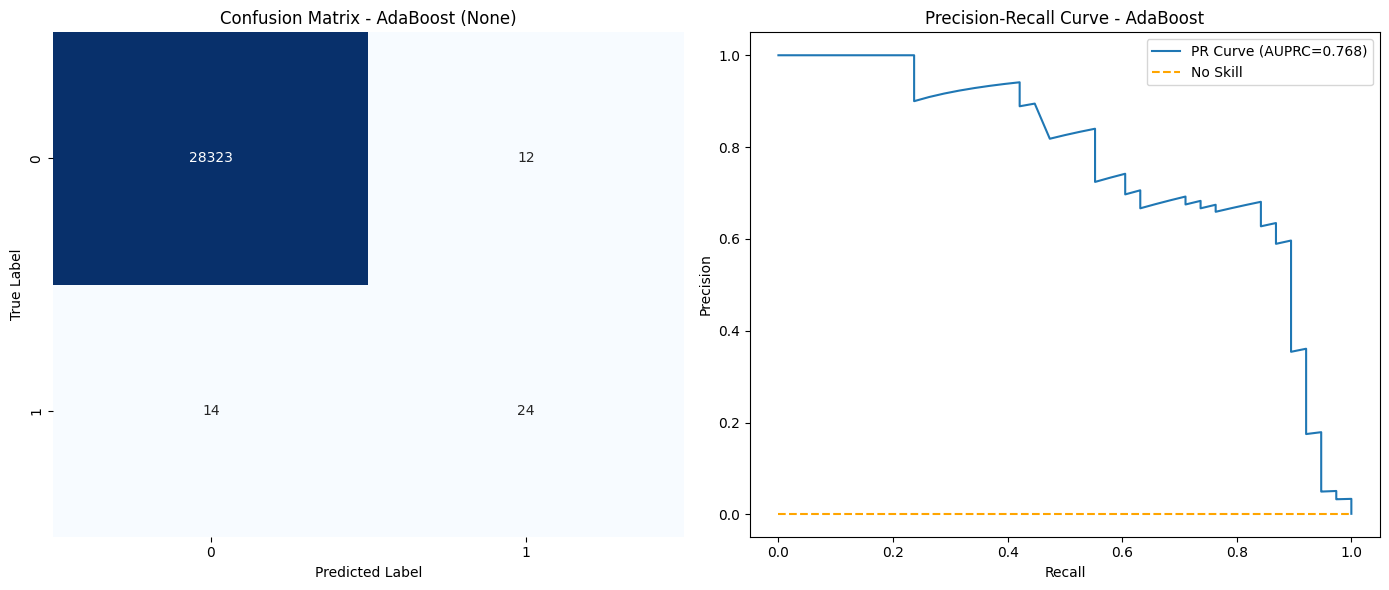

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.67      0.63      0.65        38

    accuracy                           1.00     28373
   macro avg       0.83      0.82      0.82     28373
weighted avg       1.00      1.00      1.00     28373



In [70]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=13)
ada_boost_results = evaluate_model("AdaBoost", ada_boost, X_train, y_train, "None", with_graph=True)
print(ada_boost_results)

I disabled this because of performace, though results were not promising.

In [ ]:
# for _ in [0.001, 0.01, 0.1, 0.2, 1, 10, 100]:
#     ada_boost = AdaBoostClassifier(n_estimators=100, random_state=13, learning_rate=_)
#     ada_boost_results = evaluate_model("AdaBoost", ada_boost, X_train, y_train, f"Learning Rate: {_}", with_graph=False)
#     print(ada_boost_results)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.63      0.58      0.60        38

    accuracy                           1.00     28373
   macro avg       0.81      0.79      0.80     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.73      0.50      0.59        38

    accuracy                           1.00     28373
   macro avg       0.87      0.75      0.80     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.75      0.39      0.52        38

    accuracy                           1.00     28373
   macro avg       0.87      0.70      0.76     28373
weighted avg       1.00      1.00      1.00     28373

              preci

d:\projects_last\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:565: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
d:\projects_last\.venv\Lib\site-packages\sklearn\base.py:1336: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return fit_method(estimator, *args, **kwargs)


[LightGBM] [Info] Number of positive: 388, number of negative: 226592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.160536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7929
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001709 -> initscore=-6.369901
[LightGBM] [Info] Start training from score -6.369901


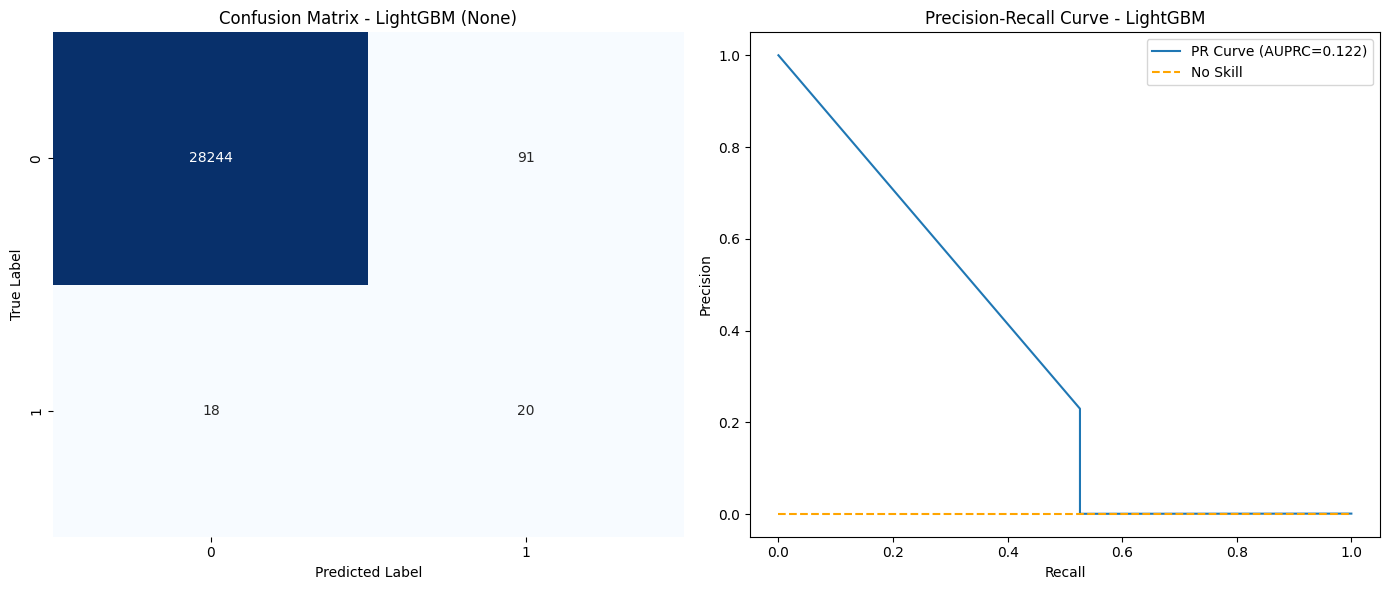

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.18      0.53      0.27        38

    accuracy                           1.00     28373
   macro avg       0.59      0.76      0.63     28373
weighted avg       1.00      1.00      1.00     28373



In [71]:
warnings.filterwarnings("ignore", category=UserWarning)
lgmb = LGBMClassifier(n_estimators=100, random_state=13, n_jobs=-1)
lgmb_results = evaluate_model("LightGBM", lgmb, X_train, y_train, "None", with_graph=True)
print(lgmb_results)

In [105]:
for _ in [0.01, 0.1, 0.2, 1, 100]:
    lgm_model = LGBMClassifier(n_estimators=100, random_state=13, learning_rate=_, verbose=-1, n_jobs=-1)
    lgm_model_results = evaluate_model("LightGBM", lgm_model, X_train, y_train, f"Learning Rate: {_}", with_graph=False)
    print(f"Learning Rate: {_}")
    print(lgm_model_results)

Learning Rate: 0.01
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.91      0.76      0.83        38

    accuracy                           1.00     28373
   macro avg       0.95      0.88      0.91     28373
weighted avg       1.00      1.00      1.00     28373

Learning Rate: 0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.18      0.53      0.27        38

    accuracy                           1.00     28373
   macro avg       0.59      0.76      0.63     28373
weighted avg       1.00      1.00      1.00     28373

Learning Rate: 0.2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.27      0.37      0.31        38

    accuracy                           1.00     28373
   macro avg       0.64      0.68      0.66     28373
weighted avg    

Catboost is a really fast gradiant boosting algorithm that uses categorical boosting, and it looks very promising. We will do a hyperparameter study for it.

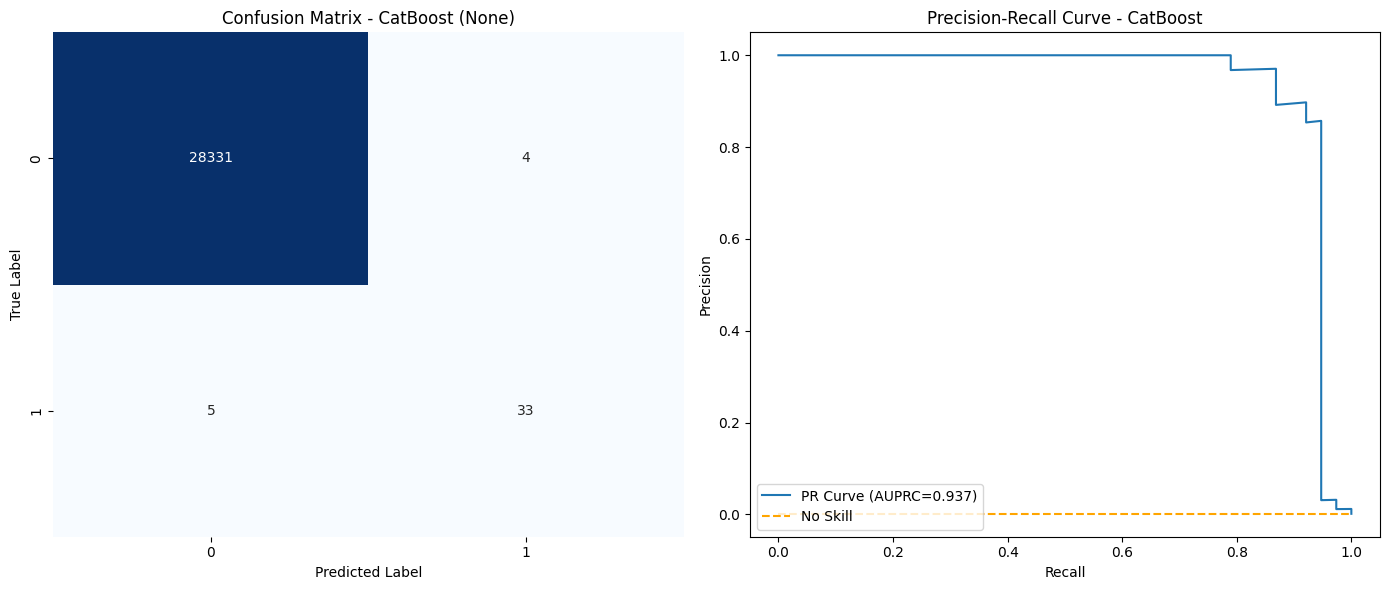

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.89      0.87      0.88        38

    accuracy                           1.00     28373
   macro avg       0.95      0.93      0.94     28373
weighted avg       1.00      1.00      1.00     28373



In [79]:
cb_plain = CatBoostClassifier(iterations=200, random_seed=13, verbose=0, thread_count=-1)
cb_plain_results = evaluate_model("CatBoost", cb_plain, X_train, y_train, "None", with_graph=True)
print(cb_plain_results)

In [80]:
for _ in [0.1, 1, 10, 50, 100]:
    model_catboost = CatBoostClassifier(iterations=200, random_seed=13, verbose=0, thread_count=-1, class_weights=[1, _])
    res = evaluate_model("CatBoost", model_catboost, X_train, y_train, f"Class Weights{{0:1, 1:{_}}}")
    print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.97      0.87      0.92        38

    accuracy                           1.00     28373
   macro avg       0.99      0.93      0.96     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.89      0.87      0.88        38

    accuracy                           1.00     28373
   macro avg       0.95      0.93      0.94     28373
weighted avg       1.00      1.00      1.00     28373

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.95      0.92      0.93        38

    accuracy                           1.00     28373
   macro avg       0.97      0.96      0.97     28373
weighted avg       1.00      1.00      1.00     28373

              preci

In [103]:
results_df = pd.DataFrame(results)
print(f"\n--- FINAL COMPARISON TABLE --- // {results_df.shape}")
print(results_df.sort_values(by="AUPRC", ascending=False).to_markdown(index=False))


--- FINAL COMPARISON TABLE --- // (73, 6)
| Model               | Sampling Technique                        |      AUPRC |   Recall |   Precision |   F1 Score |
|:--------------------|:------------------------------------------|-----------:|---------:|------------:|-----------:|
| CatBoost            | Class Weights{0:1, 1:50}                  | 0.952778   | 0.921053 |  0.853659   | 0.886076   |
| LightGBM            | Learning Rate: 0.001                      | 0.941123   | 0        |  0          | 0          |
| LightGBM            | Learning Rate: 0.001                      | 0.941123   | 0        |  0          | 0          |
| CatBoost            | Class Weights{0:1, 1:0.1}                 | 0.94048    | 0.868421 |  0.970588   | 0.916667   |
| CatBoost            | Class Weights{0:1, 1:1}                   | 0.936896   | 0.868421 |  0.891892   | 0.88       |
| CatBoost            | None                                      | 0.936896   | 0.868421 |  0.891892   | 0.88       |
| Lig

In [83]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial, model_name, X_tr, y_tr):    
    if model_name == "LogisticRegression":
        C = trial.suggest_float("C", 1e-4, 1e2, log=True)
        class_weight = trial.suggest_categorical("class_weight", [None, "balanced", {0: 1, 1: 10}, {0: 1, 1: 50}])
        model = LogisticRegression(C=C, class_weight=class_weight, max_iter=1000, random_state=13)
    
    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
        class_weight = trial.suggest_categorical("class_weight", [None, "balanced", {0: 1, 1: 10}, {0: 1, 1: 50}])
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                      min_samples_split=min_samples_split, class_weight=class_weight,
                                      random_state=13, n_jobs=-1)
    
    elif model_name == "XGBoost":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        n_estimators = trial.suggest_int("n_estimators", 50, 200)
        scale_pos_weight = trial.suggest_float("scale_pos_weight", 1, 100)
        model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators,
                             scale_pos_weight=scale_pos_weight, eval_metric="logloss", random_state=13, n_jobs=-1)
    
    elif model_name == "CatBoost":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
        max_depth = trial.suggest_int("max_depth", 3, 10)
        iterations = trial.suggest_int("iterations", 100, 300)
        class_weights = trial.suggest_categorical("class_weights", [[1, 10], [1, 50], [1, 100]])
        model = CatBoostClassifier(learning_rate=learning_rate, max_depth=max_depth, iterations=iterations,
                                  class_weights=class_weights, verbose=0, random_seed=13, thread_count=-1)
    
    elif model_name == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 15)
        weights = trial.suggest_categorical("weights", ["uniform", "distance"])
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, n_jobs=-1)
    
    # Train and evaluate
    model.fit(X_tr, y_tr)
    y_prob = model.predict_proba(X_val)[:, 1]
    auprc = average_precision_score(y_val, y_prob)
    
    return auprc


def run_hyperparameter_tuning(model_name, n_trials=100):

    sampler = TPESampler(seed=13)
    pruner = MedianPruner(n_warmup_steps=5)
    
    study = optuna.create_study(direction="maximize", sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train), 
                   n_trials=n_trials, show_progress_bar=True)
    
    print(f"\n{"="*60}")
    print(f"Best trial for {model_name}:")
    print(f"{"="*60}")
    print(f"AUPRC: {study.best_value:.4f}")
    print(f"Best hyperparameters: {study.best_params}")
    
    return study.best_params, study

In [84]:
best_params, study = run_hyperparameter_tuning("CatBoost", n_trials=10)

Best trial: 1. Best value: 0.925254: 100%|██████████| 10/10 [03:27<00:00, 20.70s/it]


Best trial for CatBoost:
AUPRC: 0.9253
Best hyperparameters: {'learning_rate': 0.07936509981223044, 'max_depth': 9, 'iterations': 228, 'class_weights': [1, 10]}


0:	learn: 0.4688122	total: 195ms	remaining: 44.4s
1:	learn: 0.3175976	total: 362ms	remaining: 40.9s
2:	learn: 0.2189708	total: 590ms	remaining: 44.3s
3:	learn: 0.1541891	total: 755ms	remaining: 42.3s
4:	learn: 0.1145804	total: 939ms	remaining: 41.9s
5:	learn: 0.0858718	total: 1.09s	remaining: 40.5s
6:	learn: 0.0641158	total: 1.27s	remaining: 40.1s
7:	learn: 0.0487957	total: 1.45s	remaining: 40s
8:	learn: 0.0388380	total: 1.64s	remaining: 39.9s
9:	learn: 0.0313950	total: 1.82s	remaining: 39.7s
10:	learn: 0.0264773	total: 2s	remaining: 39.4s
11:	learn: 0.0223393	total: 2.18s	remaining: 39.3s
12:	learn: 0.0197159	total: 2.39s	remaining: 39.6s
13:	learn: 0.0177139	total: 2.57s	remaining: 39.3s
14:	learn: 0.0164822	total: 2.75s	remaining: 39s
15:	learn: 0.0155824	total: 2.92s	remaining: 38.7s
16:	learn: 0.0142965	total: 3.14s	remaining: 39s
17:	learn: 0.0131669	total: 3.36s	remaining: 39.2s
18:	learn: 0.0122599	total: 3.6s	remaining: 39.6s
19:	learn: 0.0119186	total: 3.77s	remaining: 39.2s


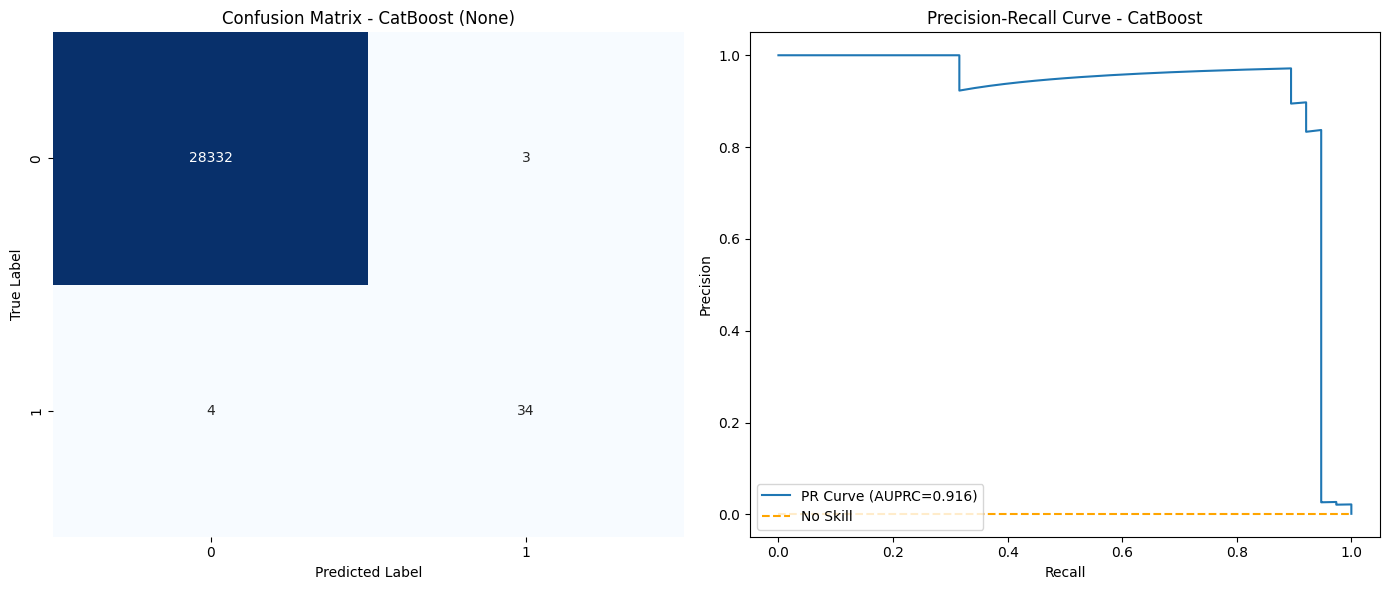

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28335
           1       0.92      0.89      0.91        38

    accuracy                           1.00     28373
   macro avg       0.96      0.95      0.95     28373
weighted avg       1.00      1.00      1.00     28373



In [88]:
cb_plain = CatBoostClassifier(**best_params)
cb_plain_results = evaluate_model("CatBoost", cb_plain, X_train, y_train, "None", with_graph=True)
print(cb_plain_results)

============================================================
Best trial for CatBoost:
============================================================
AUPRC: 0.9468
Best hyperparameters: {'learning_rate': 0.03810210980374369, 'max_depth': 10, 'iterations': 147, 'class_weights': [1, 10]}

In [97]:
def focal_loss(alpha=0.75, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        bce = keras.backend.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
        modulating_factor = tf.pow(1.0 - p_t, gamma)
        return tf.reduce_mean(alpha_factor * modulating_factor * bce)
    return loss

Epoch 1/20
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - auprc: 0.6095 - loss: 0.0019 - precision: 0.4181 - recall: 0.6778 - val_auprc: 0.7387 - val_loss: 4.6780e-04 - val_precision: 0.7750 - val_recall: 0.8158
Epoch 2/20
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - auprc: 0.7593 - loss: 8.4105e-04 - precision: 0.8305 - recall: 0.7577 - val_auprc: 0.7800 - val_loss: 3.7225e-04 - val_precision: 0.7561 - val_recall: 0.8158
Epoch 3/20
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - auprc: 0.8011 - loss: 6.9477e-04 - precision: 0.8721 - recall: 0.7732 - val_auprc: 0.8291 - val_loss: 2.8336e-04 - val_precision: 0.7273 - val_recall: 0.8421
Epoch 4/20
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - auprc: 0.8145 - loss: 6.3817e-04 - precision: 0.8600 - recall: 0.7758 - val_auprc: 0.8362 - val_loss: 2.6877e-04 - val_precision: 0.8621 - val_recall: 0.6579
Epoch 5/20
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - auprc: 0.8350 - loss: 5.6081e-04 - precision: 0.8559 - recall: 0.7809 - val_auprc: 0.8395 -

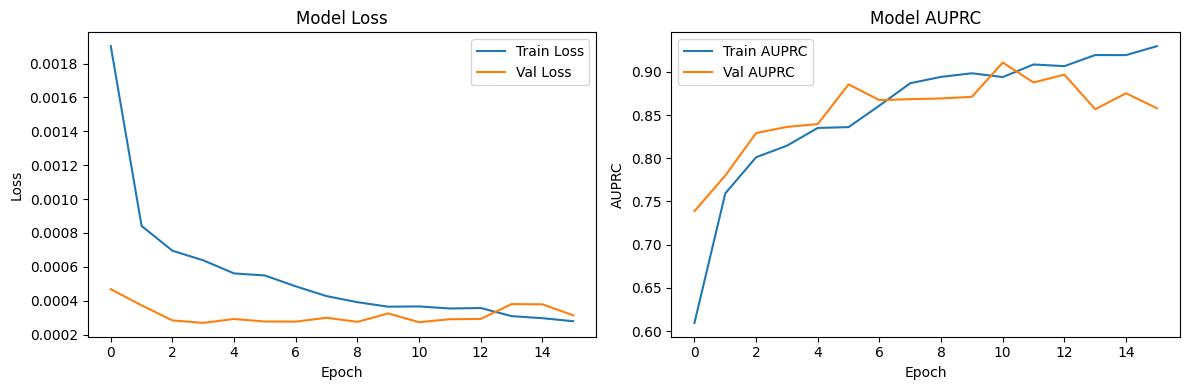

In [99]:
warnings.filterwarnings("ignore")

# Scaling for nn
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_val_scaled = scaler_nn.transform(X_val)
X_test_scaled = scaler_nn.transform(X_test)

# Build nn with 2 hidden layers
model_nn = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation="sigmoid")
])

# Compile with AUPRC metric
model_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=focal_loss(alpha=0.6, gamma=2.0),
    metrics=[
        keras.metrics.AUC(curve="PR", name="auprc"),
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall")
    ]
)
# Early stop on validation AUPRC (maximize)
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_auprc", mode="max", patience=5, restore_best_weights=True
)

# Train the model
history = model_nn.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=128,
    class_weight={0: 1, 1: 50},
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on validation set
y_pred_nn = model_nn.predict(X_val_scaled)
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int).flatten()

auprc_nn = average_precision_score(y_val, y_pred_nn)
recall_nn = recall_score(y_val, y_pred_nn_binary)
precision_nn = precision_score(y_val, y_pred_nn_binary)
f1_nn = f1_score(y_val, y_pred_nn_binary)

results.append({
    "Model": "Neural Network",
    "Sampling Technique": "2 Hidden Layers (64, 32)",
    "AUPRC": auprc_nn,
    "Recall": recall_nn,
    "Precision": precision_nn,
    "F1 Score": f1_nn
})

print(f"Neural Network Results:")
print(f"AUPRC: {auprc_nn:.4f}, Recall: {recall_nn:.4f}, Precision: {precision_nn:.4f}, F1: {f1_nn:.4f}")
print(classification_report(y_val, y_pred_nn_binary))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["auprc"], label="Train AUPRC")
plt.plot(history.history["val_auprc"], label="Val AUPRC")
plt.title("Model AUPRC")
plt.xlabel("Epoch")
plt.ylabel("AUPRC")
plt.legend()
plt.tight_layout()
plt.show()

Neural Network Results:
AUPRC: 0.8545, Recall: 0.9211, Precision: 0.4070, F1: 0.5645

As we can see, if we train our model for accuracy in this kind of imbalanced dataset; our precision will be ruined.

We selected AUPRC (Area Under the Precision-Recall Curve) as our primary metric. AUPRC focuses specifically on the positive class and does not give credit for correctly classifying the massive number of normal transactions.

Best Model: The CatBoost Classifier with Class Weights (1:50) yielded the best performance.

AUPRC: 0.95

Recall: 0.92

Precision: 0.85

Conclusion: While Tree-based Ensemble methods (CatBoost, LightGBM, XGBoost) generally outperformed linear models, CatBoost demonstrated superior handling of the imbalanced data without requiring extensive preprocessing or synthetic sampling (like SMOTE). The Neural Network showed promise but was more computationally expensive for a wrose level of performance. I tried to optimise the nn for AUPRC but how many times i tried, it took so long and sometimes python just fails.

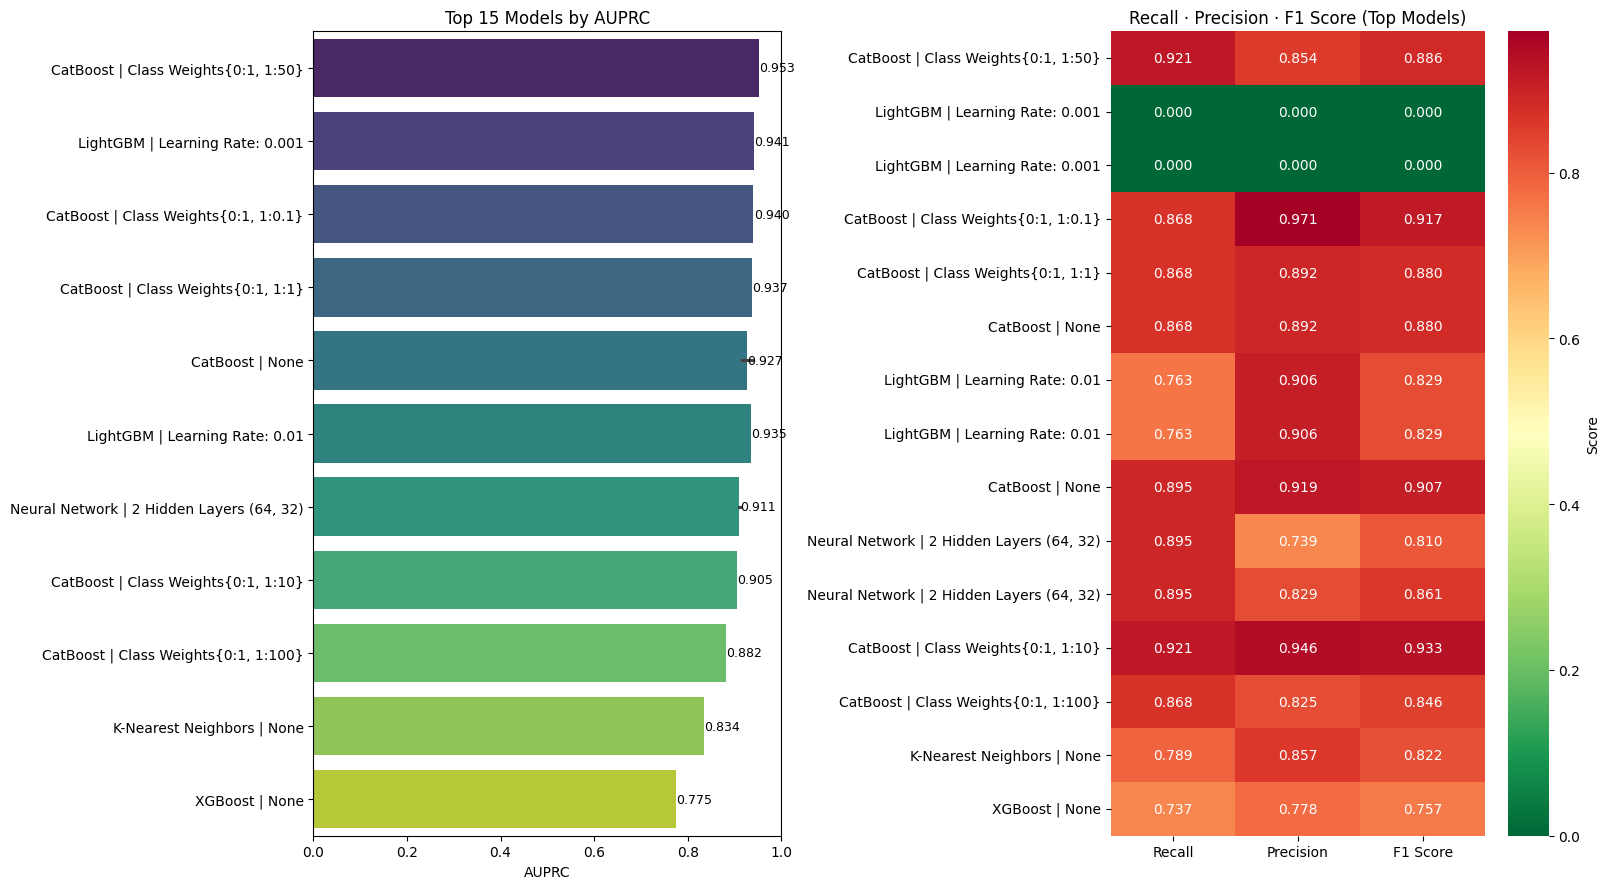

In [108]:
# Visualize top models by AUPRC and show Recall/Precision/F1 heatmap
top_n = 15
df_viz = results_df.copy()
df_viz["Name"] = df_viz["Model"] + " | " + df_viz["Sampling Technique"]
df_top = df_viz.sort_values("AUPRC", ascending=False).head(top_n).reset_index(drop=True)

plt.figure(figsize=(16, 9))

# Left: horizontal barplot of AUPRC
ax1 = plt.subplot(1, 2, 1)
sns.barplot(data=df_top, x="AUPRC", y="Name", palette="viridis", ax=ax1)
ax1.set_title(f"Top {top_n} Models by AUPRC")
ax1.set_xlabel("AUPRC")
ax1.set_ylabel("")
for p in ax1.patches:
    ax1.annotate(f"{p.get_width():.3f}", (p.get_width() + 0.001, p.get_y() + p.get_height() / 2),
                 va="center", fontsize=9)

# Right: heatmap for Recall / Precision / F1 Score for the same top models
ax2 = plt.subplot(1, 2, 2)
metrics = ["Recall", "Precision", "F1 Score"]
heat_df = df_top.set_index("Name")[metrics]
sns.heatmap(heat_df, annot=True, fmt=".3f", cmap="RdYlGn_r", cbar_kws={"label": "Score"}, ax=ax2)
ax2.set_title("Recall · Precision · F1 Score (Top Models)")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()